In [1]:
from keras import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

snr = 7 # SNR Index 1: 0dB, 2:5dB, 3:10dB, 4:20dB, etc...
# Load Matlab DataSets
mat = loadmat('./DNN_Dataset_{}.mat'.format(snr))
Dataset = mat['Preamble_Error_Correction_Dataset']
Dataset = Dataset[0, 0]
X = Dataset['X']
Y = Dataset['Y']
print('Loaded Dataset Inputs: ', X.shape)
print('Loaded Dataset Outputs: ', Y.shape)

# Normalizing Datasets
scalerx = StandardScaler()
scalerx.fit(X)
scalery = StandardScaler()
scalery.fit(Y)
XS = scalerx.transform(X)
YS = scalery.transform(Y)

# Split Data into train and test sets
seed = 7
train_X, test_X, train_Y, test_Y = train_test_split(XS, YS, test_size=0.2, random_state=seed)
print('Training samples: ', train_X.shape[0])
print('Testing samples: ', test_X.shape[0])


Using TensorFlow backend.


Loaded Dataset Inputs:  (1000, 104)
Loaded Dataset Outputs:  (1000, 104)
Training samples:  800
Testing samples:  200


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import TruncatedNormal

# Initialize the TruncatedNormal
init = TruncatedNormal(mean=0.0, stddev=0.05)

# Build the model using the Sequential API
model = Sequential([
    Dense(104, activation='relu', kernel_initializer=init, bias_initializer=init, input_shape=(104,)),
    Dense(104, activation='relu', kernel_initializer=init, bias_initializer=init),
    Dense(104, kernel_initializer=init, bias_initializer=init)
])


In [4]:
# Compile the model.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 104)               10920     
_________________________________________________________________
dense_1 (Dense)              (None, 104)               10920     
_________________________________________________________________
dense_2 (Dense)              (None, 104)               10920     
Total params: 32,760
Trainable params: 32,760
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model path
model_path = './LS_DNN_{}.h5'.format(snr)

# Set up ModelCheckpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='max')

# List of callbacks
callbacks_list = [checkpoint]

# Training parameters
epochs = 500
batch_size = 32

# Train the model
history = model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size,
                    verbose=2, validation_split=0.25, callbacks=callbacks_list)


Epoch 1/500
19/19 - 3s - loss: 0.7645 - acc: 0.0333 - val_loss: 0.3026 - val_acc: 0.0550
Epoch 2/500
19/19 - 0s - loss: 0.1871 - acc: 0.0750 - val_loss: 0.1275 - val_acc: 0.0900
Epoch 3/500
19/19 - 0s - loss: 0.1136 - acc: 0.1017 - val_loss: 0.1015 - val_acc: 0.1150
Epoch 4/500
19/19 - 0s - loss: 0.0820 - acc: 0.1983 - val_loss: 0.0636 - val_acc: 0.2200
Epoch 5/500
19/19 - 0s - loss: 0.0411 - acc: 0.2900 - val_loss: 0.0257 - val_acc: 0.3000
Epoch 6/500
19/19 - 0s - loss: 0.0176 - acc: 0.3183 - val_loss: 0.0144 - val_acc: 0.3700
Epoch 7/500
19/19 - 0s - loss: 0.0130 - acc: 0.3567 - val_loss: 0.0128 - val_acc: 0.3250
Epoch 8/500
19/19 - 0s - loss: 0.0122 - acc: 0.3450 - val_loss: 0.0122 - val_acc: 0.3650
Epoch 9/500
19/19 - 0s - loss: 0.0115 - acc: 0.3667 - val_loss: 0.0117 - val_acc: 0.3900
Epoch 10/500
19/19 - 0s - loss: 0.0112 - acc: 0.3783 - val_loss: 0.0116 - val_acc: 0.4250
Epoch 11/500
19/19 - 0s - loss: 0.0110 - acc: 0.3850 - val_loss: 0.0115 - val_acc: 0.3850
Epoch 12/500
19/19 

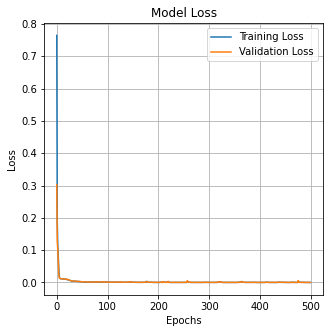

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(5, 5))

# Plot loss
#plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()